In [1]:
import pandas as pd

In [9]:
df = pd.read_csv("data/df_spotify_2.csv")

df.head()

,trackName,artistName,msPlayed,genre,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,"""Honest""",Nico Collins,191772,NaN,0.476,0.799,4.0,-4.939,0.0,0.2120,...,0.2570,0.577,162.139,audio_features,7dTxqsaFGHOXwtzHINjfHv,spotify:track:7dTxqsaFGHOXwtzHINjfHv,https://api.spotify.com/v1/tracks/7dTxqsaFGHOX...,https://api.spotify.com/v1/audio-analysis/7dTx...,191948.0,4.0
1,"""In The Hall Of The Mountain King"" from Peer G...",London Symphony Orchestra,1806234,british orchestra,0.475,0.130,7.0,-17.719,1.0,0.0510,...,0.1010,0.122,112.241,audio_features,14Qcrx6Dfjvcj0H8oV8oUW,spotify:track:14Qcrx6Dfjvcj0H8oV8oUW,https://api.spotify.com/v1/tracks/14Qcrx6Dfjvc...,https://api.spotify.com/v1/audio-analysis/14Qc...,150827.0,4.0
2,#BrooklynBloodPop!,SyKo,145610,glitchcore,0.691,0.814,1.0,-3.788,0.0,0.1170,...,0.3660,0.509,132.012,audio_features,7K9Z3yFNNLv5kwTjQYGjnu,spotify:track:7K9Z3yFNNLv5kwTjQYGjnu,https://api.spotify.com/v1/tracks/7K9Z3yFNNLv5...,https://api.spotify.com/v1/audio-analysis/7K9Z...,145611.0,4.0
3,$10,Good Morning,25058,experimental pop,0.624,0.596,4.0,-9.804,1.0,0.0314,...,0.1190,0.896,120.969,audio_features,3koAwrM1RO0TGMeQJ3qt9J,spotify:track:3koAwrM1RO0TGMeQJ3qt9J,https://api.spotify.com/v1/tracks/3koAwrM1RO0T...,https://api.spotify.com/v1/audio-analysis/3koA...,89509.0,4.0
4,(I Just) Died In Your Arms,Cutting Crew,5504949,album rock,0.625,0.726,11.0,-11.402,0.0,0.0444,...,0.0625,0.507,124.945,audio_features,4ByEFOBuLXpCqvO1kw8Wdm,spotify:track:4ByEFOBuLXpCqvO1kw8Wdm,https://api.spotify.com/v1/tracks/4ByEFOBuLXpC...,https://api.spotify.com/v1/audio-analysis/4ByE...,280400.0,4.0


In [11]:
df.shape

(10080, 22)

In [20]:
df = df.dropna()

In [42]:
from sentence_transformers import SentenceTransformer
import torch
from pprint import pprint
from sklearn.cluster import KMeans

In [32]:
df.shape

(8580, 22)

In [54]:
df["genre_copy"] = df["genre"]

In [55]:
def filmi_to_bolly(str):
    if str == "filmi":
        return "bollywood"
    return str

In [57]:
df["genre_copy"] = df["genre_copy"].apply(filmi_to_bolly)

In [58]:
device = torch.cuda.current_device() if torch.cuda.is_available() else 'cpu'

embedder = SentenceTransformer(
    "paraphrase-MiniLM-L6-v2",
    device = device
)

In [60]:
corpus = list(df["genre_copy"])

embeddings = embedder.encode(corpus)

In [63]:
num_clusters = 9

In [89]:
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(embeddings)
cluster_assignment = clustering_model.labels_

clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(corpus[sentence_id])

for i, cluster in enumerate(clustered_sentences):
    print("Cluster ", i + 1)
    print(cluster[0])
    print("")

Cluster  1
singer-songwriter pop

Cluster  2
album rock

Cluster  3
alt z

Cluster  4
cloud rap

Cluster  5
lo-fi sleep

Cluster  6
bollywood

Cluster  7
aggressive phonk

Cluster  8
british orchestra

Cluster  9
experimental pop



[['singer-songwriter pop', 'singer-songwriter pop', 'singer-songwriter pop', 'singer-songwriter pop', 'singer-songwriter pop', 'gen z singer-songwriter', 'singer-songwriter pop', 'british singer-songwriter', 'singer-songwriter pop', 'british singer-songwriter', 'singer-songwriter pop', 'singer-songwriter pop', 'gen z singer-songwriter', 'singer-songwriter pop', 'singer-songwriter pop', 'singer-songwriter pop', 'singer-songwriter pop', 'gen z singer-songwriter', 'gen z singer-songwriter', 'singer-songwriter pop', 'singer-songwriter pop', 'singer-songwriter pop', 'gen z singer-songwriter', 'singer-songwriter pop', 'singer-songwriter pop', 'gen z singer-songwriter', 'singer-songwriter pop', 'singer-songwriter pop', 'singer-songwriter pop', 'singer-songwriter pop', 'singer-songwriter pop', 'singer-songwriter pop', 'singer-songwriter pop', 'singer-songwriter pop', 'singer-songwriter pop', 'gen z singer-songwriter', 'gen z singer-songwriter', 'british singer-songwriter', 'singer-songwriter p

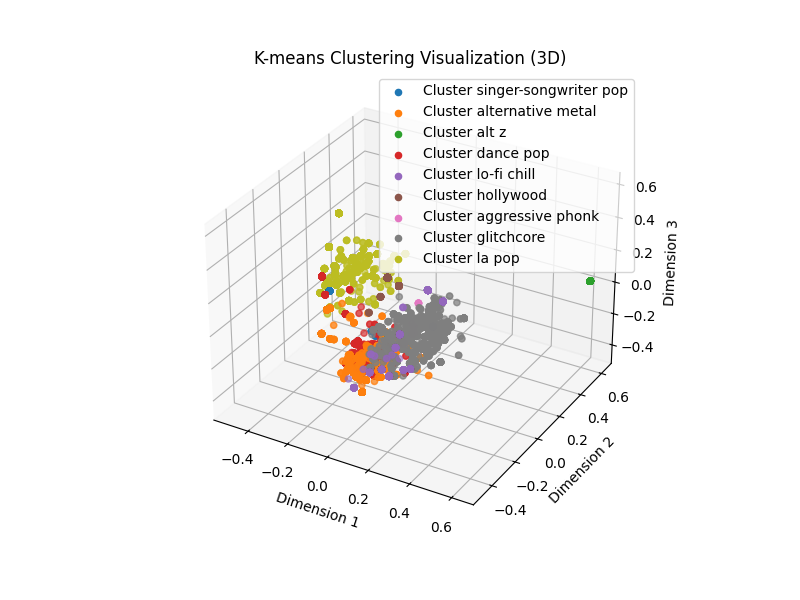

In [ ]:
import matplotlib.pyplot as plt
# %matplotlib ipympl
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

print(clustered_sentences)

pca = PCA(n_components=3)
embeddings_3d = pca.fit_transform(embeddings)

# Assuming embeddings_3d is your 3D embeddings
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
for i, cluster in enumerate(clustered_sentences):
    ax.scatter(embeddings_3d[cluster_assignment == i, 0], embeddings_3d[cluster_assignment == i, 1], embeddings_3d[cluster_assignment == i, 2], label=f'Cluster {clustered_sentences[i][1]}')
ax.legend()
ax.set_title('K-means Clustering Visualization (3D)')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
plt.show()